In [1]:
import os, sys

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import numpy as np
import astropy.units as u

smallfont = 12
largefont = 14

mpl.rcParams['axes.labelsize'] = largefont
mpl.rcParams['legend.fontsize'] = smallfont
mpl.rcParams['xtick.labelsize'] = smallfont
mpl.rcParams['ytick.labelsize'] = smallfont


In [2]:
from google.colab import drive 
drive.mount('/content/drive')

os.chdir('/content/drive/My Drive/Teaching/Resources/MyDemos')

Mounted at /content/drive


# Diffraction (single slit)

http://hyperphysics.phy-astr.gsu.edu/hbase/phyopt/sinint.html#c1

In [3]:
def intensity_diffraction(a_slit,lamb,D_screen,I0,y=None):
  """
  Small angles
  """
  if y is None:
    y = np.linspace(-10,10,500)*u.mm
  
  # Iterm = np.pi*a_slit*y/lamb/D_screen
  theta = np.arctan((y/D_screen).decompose().value)*u.radian
  Iterm = np.pi*a_slit/lamb*np.sin(theta)
  # print(Iterm.unit)
  Iterm = Iterm.decompose()*u.radian
  # print(Iterm.unit)
  I = I0 * np.sin(Iterm)**2 / Iterm**2

  return y,I

In [4]:
y,I = intensity_diffraction(a_slit=0.25*u.mm,lamb=700*u.nm,I0=8*u.W/u.m**2,D_screen=2*u.m,
                            y=np.linspace(-12,12,500)*u.mm)

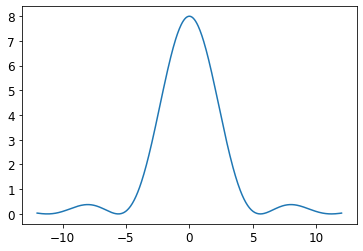

In [5]:
plt.plot(y,I)

oneslit_a0.180mm_D3.0m_600nm.png


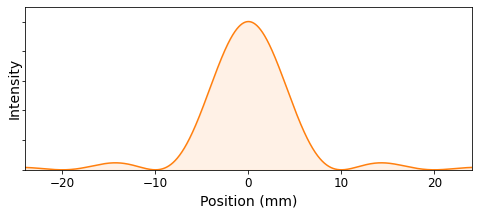

In [36]:
a_slit=1.8e5*u.nm
lamb=600*u.nm
I0=1*u.W/u.m**2
D_screen=3*u.m
xmin,xmax = -24,24
y=np.linspace(xmin,xmax,50000)*u.mm

yi,Id = intensity_diffraction(a_slit,lamb,D_screen,I0,y)

plt.figure(figsize=(8,3))
plt.plot(y,Id,"C1")
plt.ylim(0,1.1)
plt.xlim(xmin, xmax)
plt.fill_between(y,np.zeros(len(y)),Id,alpha=0.1,color="C1")
plt.xlabel("Position (mm)")
plt.ylabel("Intensity")
ax = plt.gca()
ax.tick_params(labelleft=False)
# ax.axvline(3)
filename = f"oneslit_a{a_slit.to(u.mm).value:.3f}mm_D{D_screen.to(u.m).value:.1f}m_{lamb.to(u.nm).value:.0f}nm.png"
print(filename)
plt.savefig(filename,dpi=300,bbox_inches="tight")


# Interference (two slits)

https://physics.mcmaster.ca/~luke/1e03/lecture35.pdf

In [6]:
def intensity_interference(d_slits,a_slit,lamb,D_screen,I0,y=None):
  """
  Small angles
  """
  if y is None:
    y = np.linspace(-10,10,500)*u.mm
  
  theta = (y/D_screen).decompose()*u.radian

  # Need to calculate the path-length difference between the slits
  delta_L = d_slits * np.sin(theta)

  phase_diff = (2*np.pi * delta_L / lamb).decompose()*u.radian

  I = 4 * I0 * np.cos(phase_diff / 2)**2

  return y, I

In [7]:
y,I = intensity_interference(d_slits=0.100*u.mm,a_slit=0.0001*u.micron,lamb=500*u.nm,
                             I0=8*u.W/u.m**2,D_screen=4*u.m,
                             y=np.linspace(-20,20,5000)*u.mm)

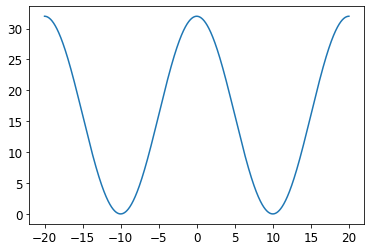

In [8]:
plt.plot(y,I)

# Combine intensity and diffraction

https://web.mit.edu/8.02t/www/802TEAL3D/visualizations/coursenotes/modules/guide14.pdf

In [9]:
def two_slit_diffraction(d_slits,a_slit,lamb,D_screen,I0,y):
  theta = np.arctan((y/D_screen).decompose().value)*u.radian
  iterm = (np.pi * d_slits * np.sin(theta) / lamb).decompose()*u.radian

  dterm = (np.pi * a_slit * np.sin(theta) / lamb).decompose()
  dterm2 = (np.sin(dterm*u.radian)/dterm)**2

  I = I0 * np.cos(iterm)**2 * dterm2
  return I

In [11]:
d_slits=1.1*u.mm
a_slit=175*u.micron
lamb=600*u.nm
I0=1*u.W/u.m**2
D_screen=3*u.m
y=np.linspace(-24,24,50000)*u.mm

yd,Id = intensity_diffraction(a_slit,lamb,D_screen,I0,y)
I_comb = two_slit_diffraction(d_slits,a_slit,lamb,D_screen,I0,y)

In [12]:
yi,Ii = intensity_interference(d_slits,a_slit,lamb,D_screen,I0,y)

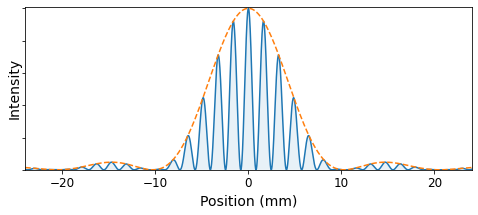

In [13]:
plt.figure(figsize=(8,3))
plt.plot(y,I_comb)
plt.plot(y,Id,'--')
# plt.plot(y,Ii)
plt.ylim(0,1.01)
plt.xlim(-24,24)
plt.fill_between(y,np.zeros(len(y)),I_comb,alpha=0.1)
plt.xlabel("Position (mm)")
plt.ylabel("Intensity")
ax = plt.gca()
ax.tick_params(labelleft=False)
filename = f"twoslit_id_a{a_slit.to(u.mm).value:.3f}mm_d{d_slits.to(u.mm).value:.3f}mm_D{D_screen.to(u.m).value:.1f}m_{lamb.to(u.nm).value:.0f}nm.png"
plt.savefig(filename,dpi=300,bbox_inches="tight")

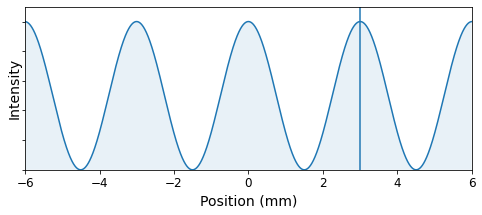

In [14]:
d_slits=0.865*u.mm
a_slit=3*u.micron
lamb=650*u.nm
I0=1*u.W/u.m**2
D_screen=4*u.m
xmin, xmax = -6,6
y=np.linspace(xmin, xmax,5000)*u.mm

I_comb = two_slit_diffraction(d_slits,a_slit,lamb,D_screen,I0,y)

plt.figure(figsize=(8,3))
plt.plot(y,I_comb)
plt.ylim(0,1.1)
plt.xlim(xmin, xmax)
plt.fill_between(y,np.zeros(len(y)),I_comb,alpha=0.1)
plt.xlabel("Position (mm)")
plt.ylabel("Intensity")
ax = plt.gca()
ax.tick_params(labelleft=False)
ax.axvline(3)
# plt.savefig("twoslit_interference.png",dpi=300,bbox_inches="tight")

twoslit_d0.665mm_D2.0m_500nm.png


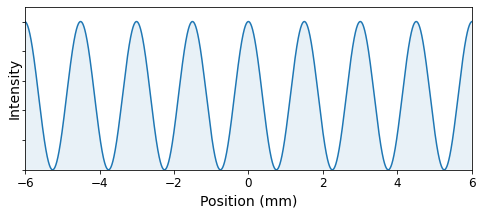

In [30]:
d_slits=0.665*u.mm
a_slit=0.00001*u.micron # Narrow! No interference
lamb=500*u.nm
I0=1*u.W/u.m**2
D_screen=2*u.m
xmin, xmax = -6,6
y=np.linspace(xmin, xmax,5000)*u.mm

I_comb = two_slit_diffraction(d_slits,a_slit,lamb,D_screen,I0,y)

plt.figure(figsize=(8,3))
plt.plot(y,I_comb)
plt.ylim(0,1.1)
plt.xlim(xmin, xmax)
plt.fill_between(y,np.zeros(len(y)),I_comb,alpha=0.1)
plt.xlabel("Position (mm)")
plt.ylabel("Intensity")
ax = plt.gca()
ax.tick_params(labelleft=False)
# ax.axvline(3)
filename = f"twoslit_d{d_slits.to(u.mm).value:.3f}mm_D{D_screen.to(u.m).value:.1f}m_{lamb.to(u.nm).value:.0f}nm.png"
print(filename)
plt.savefig(filename,dpi=300,bbox_inches="tight")